### Monday, May 1st, 2023
Was able to get [GDN](https://github.com/d-ailin/GDN) up and running on its demo data, thanks to Jim at OIT who pointed me towards the `himem` nodes on the [research cluster](https://sites.google.com/pdx.edu/research-computing/home), which have older GPUs.

Went something like this, after installing [miniconda](https://docs.conda.io/en/latest/miniconda.html) in my home directory:
```
(base) [himem01 ~]$ conda create -n torch-1.5.1
(base) [himem01 ~]$ conda activate torch-1.5.1
(torch-1.5.1) [himem01 ~]$ conda install pytorch==1.5.1 torchvision==0.6.1 cudatoolkit=10.2 -c pytorch
(torch-1.5.1) [himem01 ~]$ conda deactivate
(base) [himem01 ~]$ conda create --clone torch-1.5.1 -n gdn
(base) [himem01 ~]$ conda activate gdn
(gdn) [himem01 ~]$ git clone git@github.com:d-ailin/GDN.git
(gdn) [himem01 ~]$ cd GDN
(gdn) [himem01 GDN]$ bash install.sh
(gdn) [himem01 GDN]$ bash run.sh 0 msl
```

Now the goal is to get it running on the [WADI](https://itrust.sutd.edu.sg/itrust-labs_datasets/dataset_info/) dataset. The GDN docs give instructions for converting the WADI dataset into the proper format here: https://github.com/d-ailin/GDN/tree/main/scripts

Their instructions are to use the below data table from WADI to create a series of timestamps that are labeled with 0 for no attack and 1 from attack:

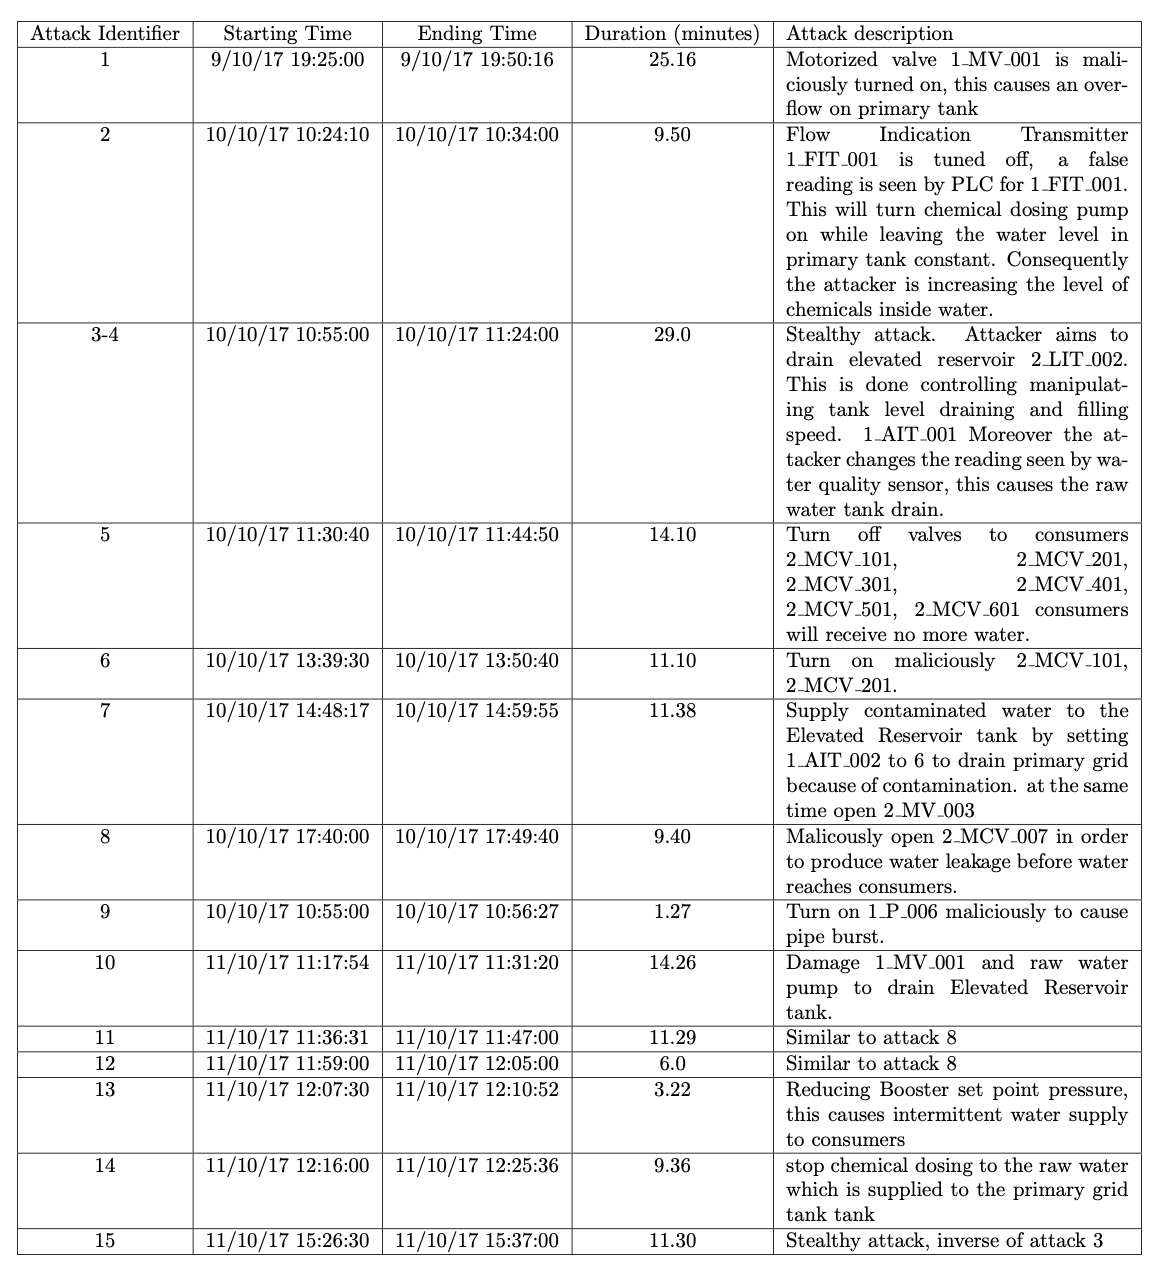

The version of WADI I have has labeled attack data already, so I'll verify that it matches the description in the table.

In [1]:
import pandas as pd

In [2]:
# doing this part on my laptop
path_to_wadi = '/Users/callie/Google Drive/My Drive/iTrust/WADI'

In [3]:
attack_data = pd.read_csv(
    path_to_wadi + '/WADI.A2_19 Nov 2019/WADI_attackdataLABLE.csv',
    skiprows=1
)

In [4]:
attack_data

,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
0,1.0,10/9/17,00:00.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
1,2.0,10/9/17,00:01.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
2,3.0,10/9/17,00:02.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
3,4.0,10/9/17,00:03.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
4,5.0,10/9/17,00:04.0,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172798,172799.0,10/11/17,59:58.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172799,172800.0,10/11/17,59:59.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172800,172801.0,10/11/17,00:00.0,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,58.8102,1.0,0.00,1
172801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
attack_data[["Date ", "Time"]][
    attack_data["Attack LABLE (1:No Attack, -1:Attack)"] < 0
]

,Date,Time
5103,10/9/17,25:03.0
5104,10/9/17,25:04.0
5105,10/9/17,25:05.0
5106,10/9/17,25:06.0
5107,10/9/17,25:07.0
...,...,...
164219,10/11/17,36:59.0
164220,10/11/17,37:00.0
164221,10/11/17,37:01.0
164222,10/11/17,37:02.0


These timestamps are missing the hours, but the minutes of the first and last attacks line up with the first and last attacks in the table (25 after the hour and 37 after the hour).

The next step is to format the data for GDN's preprocessor tools, but as I write this the cluster is undergoing some maintenance, so this part will wait until tomorrow.